In [188]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
import env
import new_lib as lib

# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## Has the network latency gone up since we switched internet service providers?
##### H0 = Network latency has not gone up since changing between service providers
##### Ha = Network latency has gone up since changing between service providers
##### True Positive = Finding that the latency has increased since changing 
##### True Negative = Finding that the latency has not changed when switching providers
##### Type 1 = Finding that latency has not changed despite there being real change
##### Type 2 = Finding change in latency despite no change occuring or latency increasing not due to provider

## Is the website redesign any good?
##### H0 = The redesign has no affect or negative affect on the clicks on our website
##### Ha = The redesign has increased clicks on the redesign
##### True Positive = Finding that clicks have increased after the redesign
##### True Negative = Finding that clicks have not changed after redesign
##### Type 1 = Finding that clicks were not effected incorrectly
##### Type 2 = Finding that clicks were effected by the redesign when there was either another reason or they were not actually effected

## Is our television ad driving more sales?
##### H0 = Sales are not increasing due to the ad or sales decreased
##### Ha = Sales are increasing due to the ad
##### True Positive = Find that Sales have increased due to the advertisment
##### True Negative = Find that the advertisment is not driving sales to increase
##### Type 1 = Find that Sales are being increased due to the advertisement incorrectly when Sales are increasing due to other factors
##### Type 2 = Find that Sales are not being driven by ads when they in fact are being driven by it

## Answer with the type of test you would use (assume normal distribution):

###### Is there a difference in grades of students on the second floor compared to grades of all students?
###### Are adults who drink milk taller than adults who dont drink milk?
###### Is the the price of gas higher in texas or in new mexico?
###### Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?


##### Use a one sample T test
##### Use a two sample T test
##### Use a two sample T test
##### Use an ANOVA test

## Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [189]:
rng = np.random.default_rng(42)
o1s = 40
o1m = 90
o1std = 15
o2s = 50
o2m = 100
o2std = 20
alpha = .05

office1 = rng.normal(o1m, o1std, size = o1s)
office2 = rng.normal(o2m, o2std, size = o2s)
stats.levene(office1,office2)

LeveneResult(statistic=0.7021879366006201, pvalue=0.4043197217974548)

In [190]:
t, p = stats.ttest_ind(office1, office2, equal_var = False)
t, p

(-3.2897905409176866, 0.0014483269202186886)

In [191]:
print('Reject H0', p <= alpha)
## They are not equal

Reject H0 True


## Load the mpg dataset and use it to answer the following questions:

###### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
###### Are compact cars more fuel-efficient than the average car?
###### Do manual cars get better gas mileage than automatic cars?

In [192]:
mpg = data('mpg')

In [193]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [194]:
mpg['fuel_efficiency'] = (mpg.cty + mpg.hwy)/2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [195]:
old_cars = mpg.fuel_efficiency[mpg.year == 1999]
new_cars = mpg.fuel_efficiency[mpg.year == 2008]
old_cars

1      23.5
2      25.0
5      21.0
6      22.0
8      22.0
9      20.5
12     20.0
13     21.0
16     19.5
22     15.0
24     21.0
25     19.0
31     13.0
32     15.5
33     23.0
35     22.0
38     21.0
39     20.5
40     19.0
41     19.0
45     18.5
46     18.0
51     15.0
52     15.5
56     14.0
57     13.0
58     15.0
62     13.5
64     13.0
71     13.0
72     13.5
74     13.0
75     14.0
76     14.0
78     15.5
79     17.0
80     15.5
83     15.0
84     15.5
85     15.5
86     14.5
87     14.5
89     13.0
91     22.0
92     21.5
95     18.0
96     18.5
100    30.5
101    28.0
102    28.5
103    26.0
104    28.0
109    22.0
110    22.5
113    22.0
114    22.0
116    22.5
117    24.0
125    17.5
126    15.5
131    13.0
134    13.0
135    14.0
136    13.5
138    15.5
141    15.0
142    25.0
143    23.0
148    22.0
149    22.0
151    15.5
152    16.0
155    22.0
156    21.0
157    22.0
160    21.5
161    21.0
166    23.5
167    22.5
168    22.5
169    22.5
174    17.5
175    18.0
176 

In [196]:
## old_norm = np.random.normal(old_cars.mean(), old_cars.std(), size = len(old_cars))
## new_norm = np.random.normal(new_cars.mean(), new_cars.std(), size = len(new_cars))
## incorrectly made random data when actual data is provided

In [197]:
old_cars.var(), new_cars.var()
stats.levene(old_cars,new_cars)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

In [198]:
t, p = stats.ttest_ind(old_cars, new_cars, equal_var= False)
t, p

(0.21960177245940962, 0.8263750772060638)

In [199]:
print('Reject H0', p < alpha)
## They are not different

Reject H0 False


In [200]:
compact = mpg.fuel_efficiency[mpg['class'] == 'compact']
avg_car = mpg.fuel_efficiency.mean()

In [201]:
t, p = stats.ttest_1samp(compact, avg_car)
t, p/2, alpha

(7.896888573132533, 2.0992818971585743e-10, 0.05)

In [202]:
if p/2 > alpha:
    print('Compact is not more efficient')
elif t < 0:
    print('Compact is not more efficient')
else:
    print('Compact is more efficient')
# Compact cars are more fuel efficient than the average car

Compact is more efficient


In [203]:
mpg['is_automatic'] = np.where(mpg.trans.str.contains('auto'), 'automatic', 'manual')

In [204]:
automatic = mpg.fuel_efficiency[mpg.is_automatic == 'automatic']
manual = mpg.fuel_efficiency[mpg.is_automatic == 'manual']

In [205]:
automatic.var(), manual.var()
stats.levene(automatic,manual)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [206]:
t, p =stats.ttest_ind(manual, automatic, equal_var = False)
t, p

(4.443514012903072, 1.7952248999917893e-05)

In [207]:
if p/2 > alpha:
    print('Manual cars do not have better milage')
if t < 0:
    print('Manual cars do not have better milage')
else:
    print('Manual cars have a better milage')

Manual cars have a better milage


## Answer with the type of stats test you would use (assume normal distribution):
##### Is there a relationship between the length of your arm and the length of your foot?
###### Pearson's R
##### Do guys and gals quit their jobs at the same rate?
###### Independant T test
##### Does the length of time of the lecture correlate with a students grade?
###### Pearson's R

## Use the telco_churn data.
### Does tenure correlate with monthly charges?
### Total charges?
### What happens if you control for phone and internet service?

In [208]:
url = lib.get_db_url('telco_churn')

In [209]:
query = 'SELECT * FROM customers'
sql = pd.read_sql(query, url)
sql.total_charges = sql.total_charges.replace(' ', np.nan).astype(float)
sql = sql.dropna()
##sql.total_charges = sql.total_charges.str.replace(' ', '0').astype(float)
##another way to acomplish the above
sql

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.90,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.70,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


Process for these

1. State hypothesis
2. Define alpha
3. Plot data
4. Check assumptions
5. Run tests
6. Draw conclusions

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

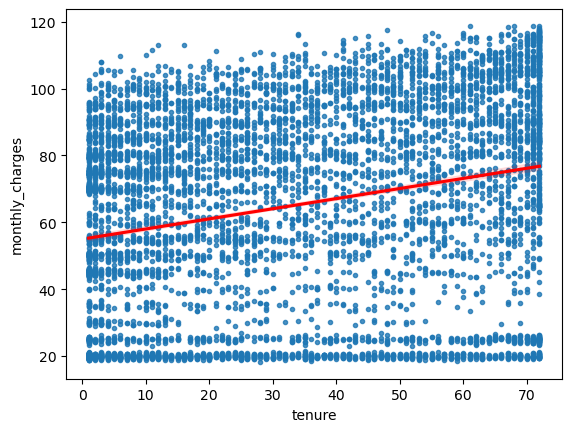

In [210]:
sns.regplot(x = 'tenure', y= 'monthly_charges', data = sql, marker = '.', line_kws = {'color': 'red'})

<AxesSubplot:>

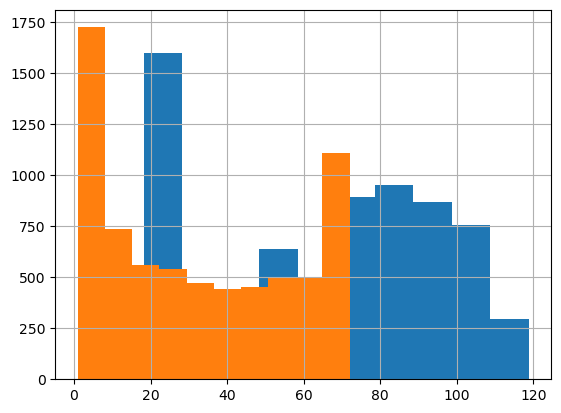

In [211]:
sql.monthly_charges.hist()
sql.tenure.hist()

In [212]:
stats.normaltest(sql.tenure, None)

NormaltestResult(statistic=75799.50922160242, pvalue=0.0)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

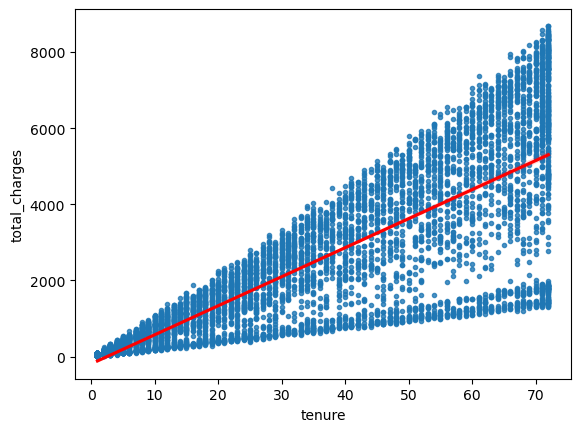

In [213]:
sns.regplot(sql.tenure, sql.total_charges, marker = '.', line_kws = {'color': 'red'})

In [214]:
corr, p = stats.spearmanr(sql.tenure, sql.monthly_charges)
corr, p
# There is a correlation but its weak

(0.2753387429197595, 1.535767470847339e-122)

In [215]:
corr, p = stats.spearmanr(sql.tenure, sql.total_charges)
corr, p
# Strongly related

(0.8891770805365491, 0.0)

In [216]:
def rtest(sql): 
    return pd.Series(stats.spearmanr(sql.tenure, sql.monthly_charges), index = ['r', 'p'])

In [217]:
sql.groupby(['phone_service', 'internet_service_type_id']).apply(rtest)

r              p
phone_service internet_service_type_id                         
No            1                         0.595373   1.871708e-66
Yes           1                         0.668567  2.583950e-225
              2                         0.627984   0.000000e+00
              3                         0.245319   2.867480e-22

## Use the employees database.
### Is there a relationship between how long an employee has been with the company and their salary?
### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [218]:
url = lib.get_db_url('employees')
query = 'SELECT s.emp_no, s.salary, s.to_date, e.hire_date FROM salaries AS s JOIN employees AS e ON e.emp_no = s.emp_no WHERE s.to_date >= NOW();'

In [219]:
sql1 = pd.read_sql(query, url)

In [220]:
sql1['tenure'] = (sql1.to_date - sql1.hire_date).astype(str).str.split(' ', expand = True)[0].astype(int)

In [221]:
corr, p= stats.spearmanr(sql1.tenure, sql1.salary)
corr, p
# Significant relationship but not very strong

(0.3128783525010577, 0.0)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure', ylabel='salary'>

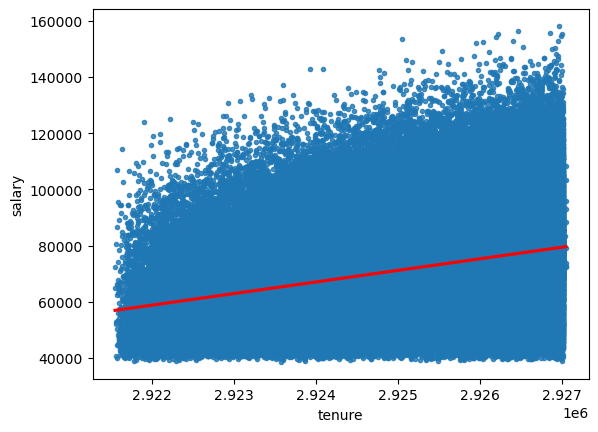

In [222]:
sns.regplot(sql1.tenure, sql1.salary, marker = '.', line_kws = {'color': 'red'})

In [223]:
query2 = 'SELECT count(title), emp_no FROM titles GROUP BY emp_no'

In [224]:
sql2 = pd.read_sql(query2, url)
sql2

,count(title),emp_no
0,1,10001
1,1,10002
2,1,10003
3,2,10004
4,2,10005
...,...,...
300019,1,499995
300020,2,499996
300021,2,499997
300022,2,499998


In [225]:
sql3 = sql1.merge(sql2, left_on= 'emp_no', right_on = 'emp_no', how = 'left', indicator = True)
sql3

,emp_no,salary,to_date,hire_date,tenure,count(title),_merge
0,10001,88958,9999-01-01,1986-06-26,2926512,1,both
1,10002,72527,9999-01-01,1985-11-21,2926729,1,both
2,10003,43311,9999-01-01,1986-08-28,2926449,1,both
3,10004,74057,9999-01-01,1986-12-01,2926354,2,both
4,10005,94692,9999-01-01,1989-09-12,2925338,2,both
...,...,...,...,...,...,...,...
240119,499995,52868,9999-01-01,1993-01-12,2924120,1,both
240120,499996,69501,9999-01-01,1990-09-27,2924958,2,both
240121,499997,83441,9999-01-01,1986-04-21,2926578,2,both
240122,499998,55003,9999-01-01,1993-10-13,2923846,2,both


In [226]:
corr, p = stats.spearmanr(sql3.tenure, sql3['count(title)'])
corr, p
# Strong relationship weak correlation

(0.25489028077289544, 0.0)

## Use the sleepstudy data.
### Is there a relationship between days and reaction time?

In [227]:
slp = data('sleepstudy')

In [228]:
slp

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [229]:
slp_r = slp[['Days', 'Reaction']].groupby(slp.Days).Reaction.mean().reset_index()
slp_r

,Days,Reaction
0,0,256.651806
1,1,264.495756
2,2,265.361900
3,3,282.992011
4,4,288.649422
5,5,308.518456
6,6,312.178256
7,7,318.750583
8,8,336.629506
9,9,350.851222


In [230]:
corr, x = stats.spearmanr(slp.Days, slp.Reaction)
corr, x

(0.5228138502259547, 5.132878057706873e-14)

## Answer with the type of stats test you would use (assume normal distribution):

##### Do students get better test grades if they have a rubber duck on their desk?
###### Independent T-Test 2 sample
##### Does smoking affect when or not someone has lung cancer?
###### Chi Square
##### Is gender independent of a person’s blood type?
###### Chi Square
##### A farming company wants to know if a new fertilizer has improved crop yield or not
###### Two Tailed T-Test
##### Does the length of time of the lecture correlate with a students grade?
######  Pearson R
##### Do people with dogs live in apartments more than people with cats?
###### Chi Square

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 	Codeup Student	Not Codeup Student
Uses a Macbook	49	20
Doesn't Use A Macbook	1	30

In [249]:
c = (49,20,1,30)
c = np.array(c).reshape(2,2)
c

## Could also turn into a dataframe with
# c = pd.DataFrame({'Codeup_Students':[49,1], 'Not_Student': [30,20]})

array([[49, 20],
       [ 1, 30]])

In [250]:
chi2, p, degf, expected = stats.chi2_contingency(c)
chi2, p
# They is association between being a Codeup student and having a Mac

(36.65264142122487, 1.4116760526193828e-09)

In [251]:
if p < alpha:
    print('There is an association')
else:
    print('No asscociation')

There is an association


Choose another 2 categorical variables from the mpg dataset and perform a 
contingency table test with them. Be sure to state your null and alternative hypotheses.



Are class and mileage independent of each other?
H0 = cylinders are not independent of year
Ha = They are independent of each other

In [233]:
mpg[['class', 'fuel_efficiency']]

,class,fuel_efficiency
1,compact,23.5
2,compact,25.0
3,compact,25.5
4,compact,25.5
5,compact,21.0
...,...,...
230,midsize,23.5
231,midsize,25.0
232,midsize,21.0
233,midsize,22.0


In [234]:
chimpg = pd.crosstab(mpg.cyl, mpg.year)
chimpg

year,1999,2008
cyl,,
4,45,36
5,0,4
6,45,34
8,27,43


In [252]:
chi2, p, degf, expected = stats.chi2_contingency(chimpg)
chi2, p
# They is association between year made and number of cylinders

(10.18878842676311, 0.01702768537665195)

In [253]:
if p < alpha:
    print('There is an association')
else:
    print('No asscociation')

There is an association


## Use the data from the employees database to answer these questions:

##### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
##### Is an employee's gender independent of whether or not they are or have been a manager?



In [258]:
url = lib.get_db_url('employees')
query = '''SELECT d.dept_name, e.emp_no, e.gender FROM departments AS d
JOIN dept_emp AS de ON d.dept_no = de.dept_no
JOIN employees AS e ON e.emp_no = de.emp_no
WHERE de.to_date >= NOW()
AND d.dept_name IN('Sales', 'Marketing')
GROUP BY d.dept_name, e.emp_no'''

In [259]:
depts = pd.read_sql(query, url)
depts

,dept_name,emp_no,gender
0,Marketing,10017,F
1,Marketing,10058,M
2,Marketing,10140,F
3,Marketing,10228,F
4,Marketing,10239,F
...,...,...,...
52538,Sales,499966,F
52539,Sales,499976,M
52540,Sales,499980,M
52541,Sales,499986,F


In [260]:
depts = pd.crosstab(depts.gender, depts.dept_name)
depts

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [261]:
#depts.drop(columns =['Customer Service', 'Development', 'Finance', 'Human Resources', 'Production', 'Quality Management', 'Research'] )
# No longer necessary filtered in sql first(Filtering in sql is best practice)

In [262]:
chi2, p, degf, expected = stats.chi2_contingency(depts)
chi2, p
# They is no association between gender and department assignment

(0.3240332004060638, 0.5691938610810126)

In [263]:
if p < alpha:
    print('There is an association')
else:
    print('No asscociation')

No asscociation


In [241]:
query = '''
SELECT emp_no, gender, dept_no FROM employees 
LEFT JOIN dept_manager USING (emp_no)
                '''
manager = pd.read_sql(query, url)
manager

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [242]:
manager.dept_no.value_counts(dropna = False)

None    300000
d004         4
d006         4
d009         4
d001         2
d002         2
d003         2
d005         2
d007         2
d008         2
Name: dept_no, dtype: int64

In [243]:
manager.dept_no = manager.dept_no.fillna('not manager')

In [265]:
manager.dept_no = np.where(manager.dept_no != 'not manager', 'manager', 'not manager')

In [245]:
mtab = pd.crosstab(manager.gender, manager.dept_no)
mtab

dept_no,manager,not manager
gender,,
F,13,120038
M,11,179962


In [256]:
chi2, p, degf, expected = stats.chi2_contingency(mtab)
chi2, p
# There is no association between gender and managerial status

(1.4566857643547197, 0.22745818732810363)

In [257]:
if p < alpha:
    print('There is an association')
else:
    print('No asscociation')

No asscociation
